In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults
from statsmodels.tools.eval_measures import meanabs, mse, rmse
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

D:\Anaconda\envs\tsa_course\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [2]:
df = pd.read_csv("Data/M2SLMoneyStock.csv",index_col=0,parse_dates=True)
df.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [3]:
df.shape

(252, 1)

In [4]:
df.index.freq = 'MS'

In [5]:
ps = pd.read_csv('Data/PCEPersonalSpending.csv',index_col=0,parse_dates=True)
ps.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [6]:
ps.shape

(252, 1)

In [7]:
ps.index.freq = 'MS'

In [8]:
df = df.join(ps,on='Date')
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [9]:
df.shape

(252, 2)

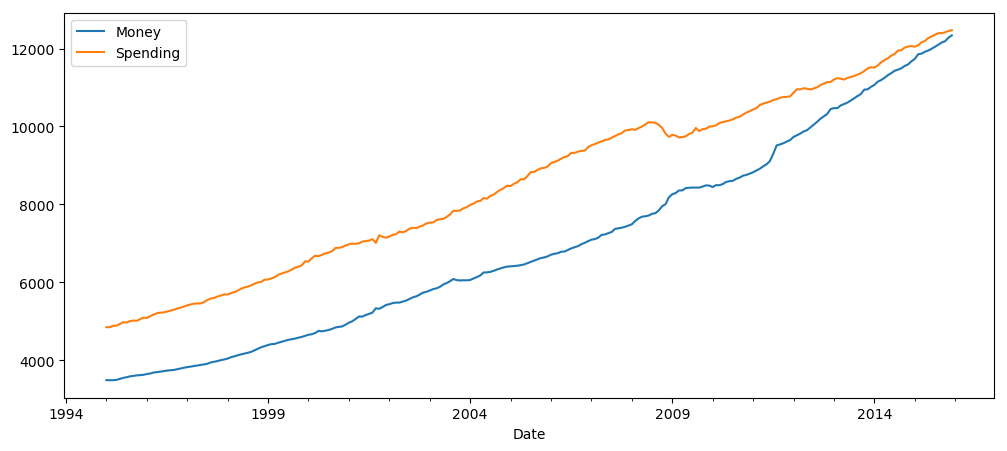

In [10]:
df.plot(figsize=(12,5));

In [11]:
def adf_test(series,title=''):
    print(f"Augmented Dickey-Fuller Test: {title}")
    adf_results = adfuller(series.dropna(),autolag='AIC')
    df_results = pd.Series(adf_results[:4],index=['test-statistic','p-value','# lags','# observations'])
    
    for key, val in adf_results[4].items():
        df_results[f'critical_value({key})'] = val
        
    print(df_results.to_string())
    
    if adf_results[1] <= 0.05:
        print("Strong evidence against null hypothesis.")
        print("Reject the null hypothesis.")
        print("Data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis.")
        print("Fail to reject the null hypothesis.")
        print("Data has a unit root and is non-stationary.")

In [12]:
adf_test(df['Money'])

Augmented Dickey-Fuller Test: 
test-statistic           4.239022
p-value                  1.000000
# lags                   4.000000
# observations         247.000000
critical_value(1%)      -3.457105
critical_value(5%)      -2.873314
critical_value(10%)     -2.573044
Weak evidence against null hypothesis.
Fail to reject the null hypothesis.
Data has a unit root and is non-stationary.


In [13]:
adf_test(df['Spending'])

Augmented Dickey-Fuller Test: 
test-statistic           0.149796
p-value                  0.969301
# lags                   3.000000
# observations         248.000000
critical_value(1%)      -3.456996
critical_value(5%)      -2.873266
critical_value(10%)     -2.573019
Weak evidence against null hypothesis.
Fail to reject the null hypothesis.
Data has a unit root and is non-stationary.


In [14]:
auto_arima(df['Money'],maxiter=1000).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(1, 2, 2)   Log Likelihood               -1172.257
Date:                Sun, 22 Sep 2024   AIC                           2354.514
Time:                        00:07:40   BIC                           2372.121
Sample:                             0   HQIC                          2361.600
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0723      0.037      1.932      0.053      -0.001       0.146
ar.L1          0.5989      0.170      3.528      0.000       0.266       0.932
ma.L1         -1.3808      1.758     -0.786      0.432      -4.826       2.064
ma.L2          0.3808      0.726      0.525      0.600      -1.042       1.804
sigma2       679.5393   1154.621      0.589      0.556   -1583.476    2942.555
===================================================================================
Ljung-Box (Q):                       77.23   Jarque-Bera (JB):               576.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.47   Skew:                             1.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
auto_arima(df['Spending'],maxiter=1000).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1238.601
Date:                Sun, 22 Sep 2024   AIC                           2487.202
Time:                        00:07:46   BIC                           2504.829
Sample:                             0   HQIC                          2494.295
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.7216      3.525      1.907      0.057      -0.186      13.630
ar.L1          0.7775      0.120      6.470      0.000       0.542       1.013
ma.L1         -0.7890      0.117     -6.767      0.000      -1.017      -0.560
ma.L2          0.1342      0.062      2.171      0.030       0.013       0.255
sigma2      1131.1366     61.857     18.286      0.000    1009.900    1252.374
===================================================================================
Ljung-Box (Q):                       34.25   Jarque-Bera (JB):               216.24
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.30
Prob(H) (two-sided):                  0.92   Kurtosis:                         7.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

It seems that VARMA(1,2) model is recommended.

In [16]:
df_diff = df.diff()
df_diff.head()

,Money,Spending
Date,,
1995-01-01,NaN,NaN
1995-02-01,-2.5,-0.4
1995-03-01,1.2,34.6
1995-04-01,8.1,4.8
1995-05-01,25.0,42.9


In [17]:
df_diff = df_diff.dropna()
df_diff.head()

,Money,Spending
Date,,
1995-02-01,-2.5,-0.4
1995-03-01,1.2,34.6
1995-04-01,8.1,4.8
1995-05-01,25.0,42.9
1995-06-01,24.7,44.4


In [18]:
adf_test(df_diff['Money'])

Augmented Dickey-Fuller Test: 
test-statistic          -2.057404
p-value                  0.261984
# lags                  15.000000
# observations         235.000000
critical_value(1%)      -3.458487
critical_value(5%)      -2.873919
critical_value(10%)     -2.573367
Weak evidence against null hypothesis.
Fail to reject the null hypothesis.
Data has a unit root and is non-stationary.


In [19]:
adf_test(df_diff['Spending'])

Augmented Dickey-Fuller Test: 
test-statistic        -7.226974e+00
p-value                2.041027e-10
# lags                 2.000000e+00
# observations         2.480000e+02
critical_value(1%)    -3.456996e+00
critical_value(5%)    -2.873266e+00
critical_value(10%)   -2.573019e+00
Strong evidence against null hypothesis.
Reject the null hypothesis.
Data has no unit root and is stationary.


In [20]:
df_diff = df_diff.diff().dropna()
df_diff.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [21]:
adf_test(df_diff['Money'])

Augmented Dickey-Fuller Test: 
test-statistic        -7.077471e+00
p-value                4.760675e-10
# lags                 1.400000e+01
# observations         2.350000e+02
critical_value(1%)    -3.458487e+00
critical_value(5%)    -2.873919e+00
critical_value(10%)   -2.573367e+00
Strong evidence against null hypothesis.
Reject the null hypothesis.
Data has no unit root and is stationary.


In [22]:
adf_test(df_diff['Spending'])

Augmented Dickey-Fuller Test: 
test-statistic        -8.760145e+00
p-value                2.687900e-14
# lags                 8.000000e+00
# observations         2.410000e+02
critical_value(1%)    -3.457779e+00
critical_value(5%)    -2.873609e+00
critical_value(10%)   -2.573202e+00
Strong evidence against null hypothesis.
Reject the null hypothesis.
Data has no unit root and is stationary.


### Train-test split

In [23]:
test_size = 12
train = df_diff[:-test_size]
test = df_diff[-test_size:]

In [24]:
train.shape, test.shape

((238, 2), (12, 2))

In [25]:
train.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [26]:
test.head()

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8


### VARMA Model Training & Evaluation

In [27]:
varmax = VARMAX(train,order=(1,2),trend='c')
results = varmax.fit(maxiter=1000,disp=False)
results.summary()

Dep. Variable:,"['Money', 'Spending']",No. Observations:,238
Model:,"VARMA(1,2)",Log Likelihood,-2286.620
,+ intercept,AIC,4607.240
Date:,"Sun, 22 Sep 2024",BIC,4666.269
Time:,00:08:10,HQIC,4631.030
Sample:,03-01-1995,,
,- 12-01-2014,,
Covariance Type:,opg,,
Ljung-Box (Q):,"68.26, 28.80",Jarque-Bera (JB):,"550.93, 117.16"
Prob(Q):,"0.00, 0.91",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"5.60, 2.91",Skew:,"1.34, -0.35"


In [28]:
forecast = results.forecast(test_size)
forecast

,Money,Spending
2015-01-01,-11.407362,36.823004
2015-02-01,-11.478305,-4.096214
2015-03-01,1.840614,-0.335133
2015-04-01,-2.025606,-0.190566
2015-05-01,1.426395,0.197637
2015-06-01,-0.681016,0.031007
2015-07-01,0.738129,0.157216
2015-08-01,-0.191154,0.077097
2015-09-01,0.422116,0.130439
2015-10-01,0.018277,0.095399


In [29]:
# Add the most recent first-order difference from the training side of the original dataset to the cumulative sum of forecasted values
forecast['Money_1d'] = df['Money'].iloc[-test_size-1] - df['Money'].iloc[-test_size-2] + forecast['Money'].cumsum()

# Now build the forecast values using the first difference set
forecast['Money_forecast'] = df['Money'].iloc[-test_size-1] + forecast['Money'].cumsum()

In [30]:
# Add the most recent first order difference from the training side of the original dataset to the cumulative sum of forecasted values
forecast['Spending_1d'] = df['Spending'].iloc[-test_size-1] - df['Spending'].iloc[-test_size-2] + forecast['Spending'].cumsum()

# Now build the forecast values using the first difference set
forecast['Spending_forecast'] = df['Spending'].iloc[-test_size-1] + forecast['Spending'].cumsum()

In [31]:
forecast.head()

,Money,Spending,Money_1d,Money_forecast,Spending_1d,Spending_forecast
2015-01-01,-11.407362,36.823004,67.192638,11658.692638,47.423004,12098.823004
2015-02-01,-11.478305,-4.096214,55.714334,11647.214334,43.326789,12094.726789
2015-03-01,1.840614,-0.335133,57.554947,11649.054947,42.991657,12094.391657
2015-04-01,-2.025606,-0.190566,55.529341,11647.029341,42.801091,12094.201091
2015-05-01,1.426395,0.197637,56.955736,11648.455736,42.998728,12094.398728


In [34]:
test_data = df[-test_size:]
test_data

,Money,Spending
Date,,
2015-01-01,11733.2,12046.0
2015-02-01,11852.4,12082.4
2015-03-01,11868.8,12158.3
2015-04-01,11916.1,12193.8
2015-05-01,11947.6,12268.1
2015-06-01,11993.1,12308.3
2015-07-01,12045.3,12355.4
2015-08-01,12096.8,12394.0
2015-09-01,12153.8,12392.8


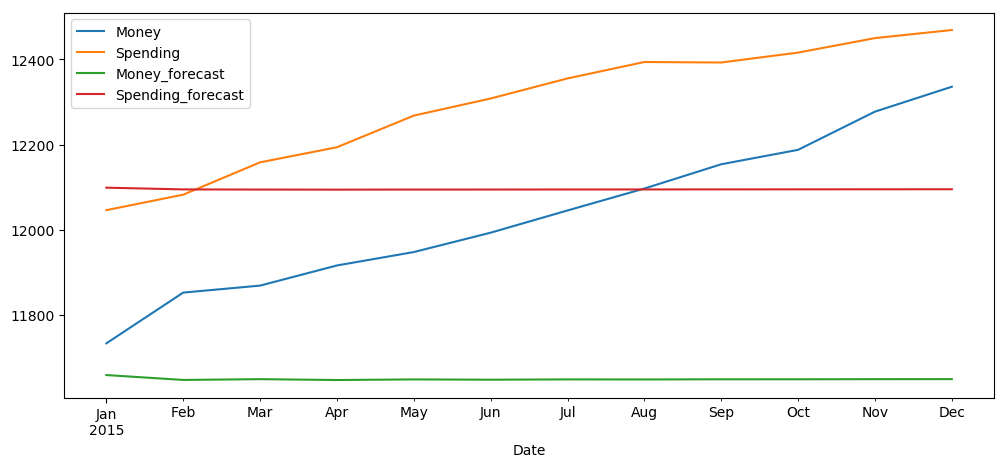

In [36]:
ax = test_data.plot(figsize=(12,5))
forecast[['Money_forecast','Spending_forecast']].plot(figsize=(12,5),ax=ax);

In [37]:
print("MAE:", meanabs(test_data['Money'],forecast['Money_forecast']))
print("MSE:", mse(test_data['Money'],forecast['Money_forecast']))
print("RMSE:", rmse(test_data['Money'],forecast['Money_forecast']))

MAE: 384.77798856579966
MSE: 178969.2554765247
RMSE: 423.04758062956074


In [38]:
print("MAE:", meanabs(test_data['Spending'],forecast['Spending_forecast']))
print("MSE:", mse(test_data['Spending'],forecast['Spending_forecast']))
print("RMSE:", rmse(test_data['Spending'],forecast['Spending_forecast']))

MAE: 210.38942914443956
MSE: 59035.42202687994
RMSE: 242.97206017746143
